In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### shape of the dataset

In [3]:
df.shape

(891, 12)

There are 891 rows and 12 columns

### Checking the numerical and categorical columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 5 categorical columns and 7 numerical columns

### Checking the null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5 point summary for the numerical columns

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5 point summary categorical columns

In [7]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Number of people who survived and did not survive

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

1. The value 0 represents that they did not survive and count is 549
2. The value 1 represents that they survive and count is 342

# Univariate analysis

### Survival Rate

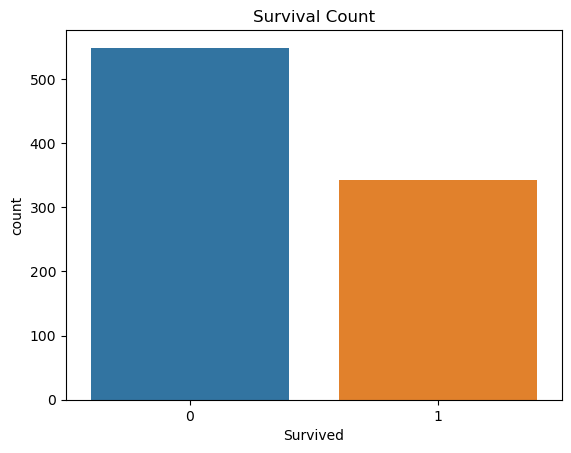

In [9]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

### P class distribution

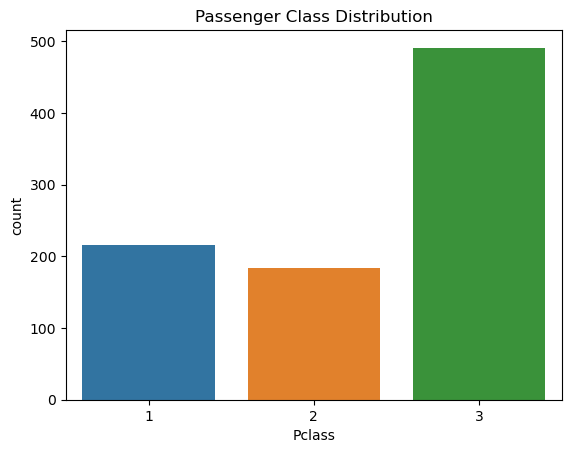

In [10]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

The maximum passengers are in 3rd P class with a count of 491.

### Gender Distribution

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

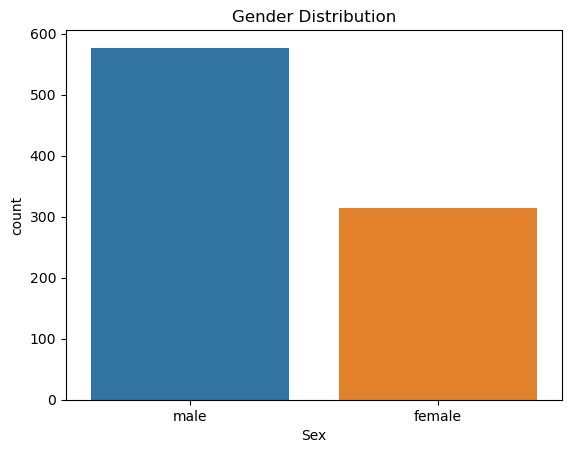

In [13]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

There are maximum males with a count of 577 and less count of females with count of 314.

### Age distribution

In [14]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

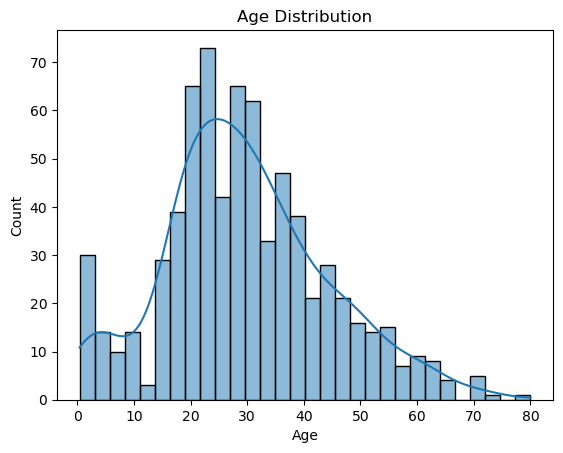

In [15]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

1. There are maximum passengers with age 24 with a count of 30, and age of 74 count is 1.
2. The data is normally distributed.

### Siblings/ Spouses Distribution

In [16]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

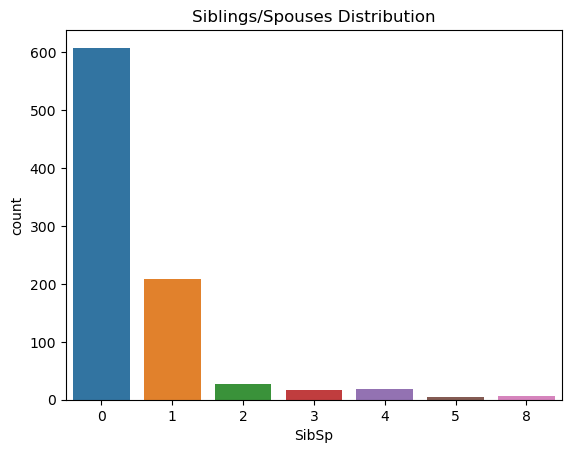

In [17]:
sns.countplot(x='SibSp', data=df)
plt.title('Siblings/Spouses Distribution')
plt.show()

1. The passenger count having no siblings/spouses is 608.
2. The passenger count having 1 sibling is 209.
3. The passenger coint having 2 sibling is 28.
4. The passenger having 4 siblings or spouses is 18.

### Parents/Children Distribution

In [18]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

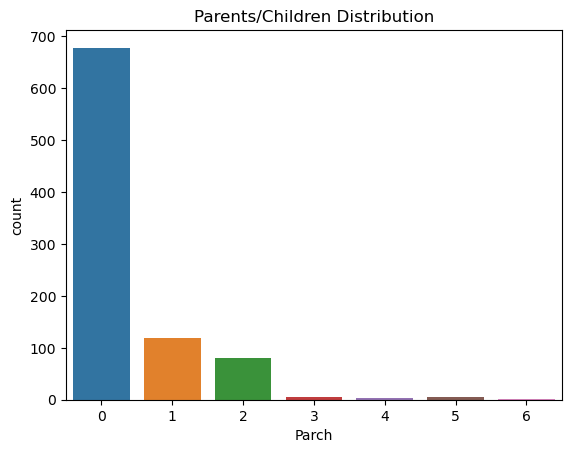

In [19]:
sns.countplot(x='Parch', data=df)
plt.title('Parents/Children Distribution')
plt.show()

# Bivariate Analysis

### Survival Rate by class

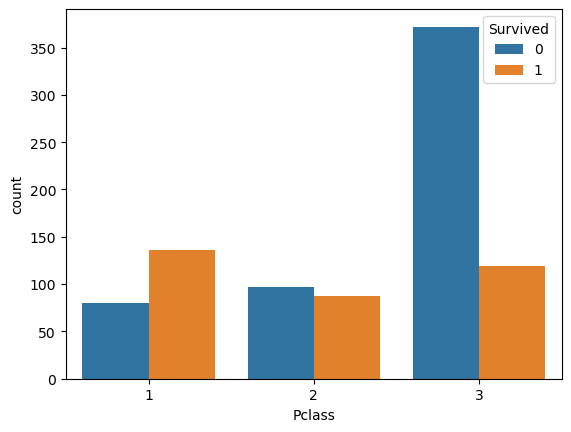

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

1. The passengers which are from 1st P class have survived more in compared to other P class 2nd and 3rd.
2. The passengers who did not survive are from 3rd P class

### Survival Rate by Gender

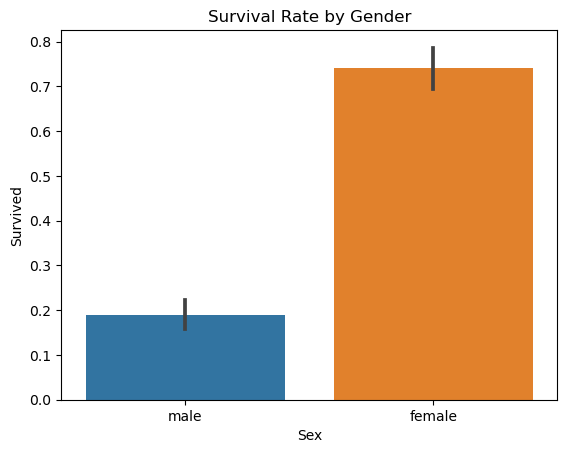

In [21]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

1. The female have survived more than males.

### Survival Rate by Age Group:

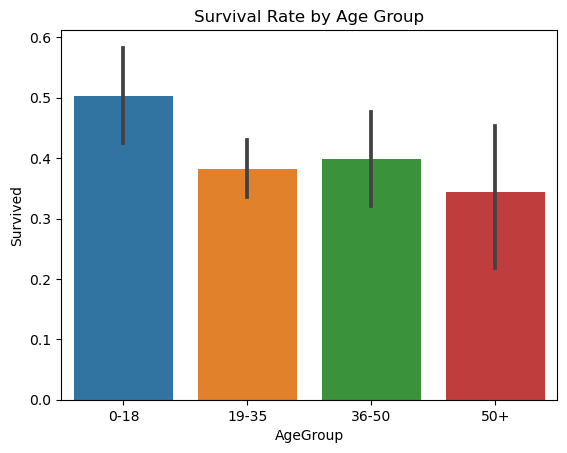

In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '50+'])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

Passengers in the age group 0-18 had a relatively higher survival rate compared to other age groups.

### Survival Rate by Siblings/Spouses

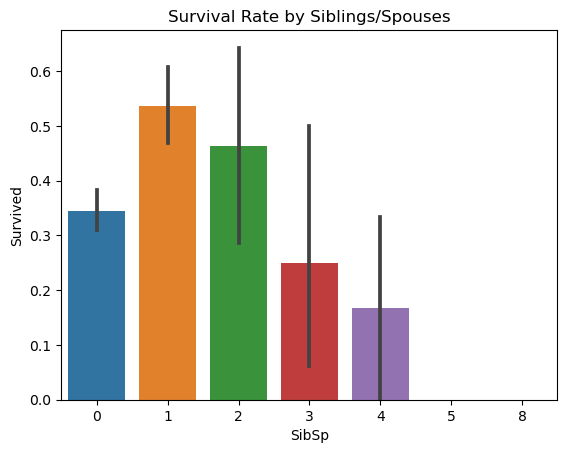

In [23]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by Siblings/Spouses')
plt.show()

Passengers with 1 siblings or spouses aboard had a slightly higher survival rate.

### Survival Rate by Parents/Children

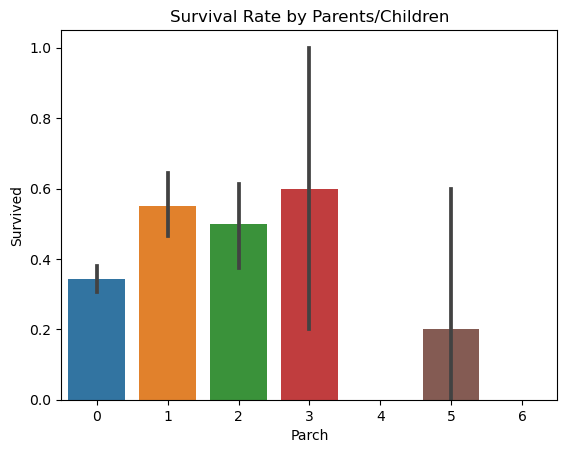

In [24]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parents/Children')
plt.show()

Passengers with fewer parents or children aboard had a slightly higher survival rate.

### Checking the correlation of the dataset

C:\Users\madhu\AppData\Local\Temp\ipykernel_16096\1729857075.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


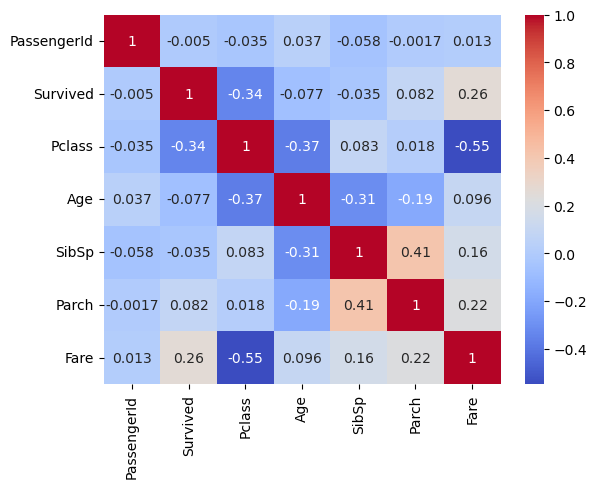

In [25]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Encoding the Categorical columns

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['AgeGroup_LabelEncoded'] = label_encoder.fit_transform(df['AgeGroup'])

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,AgeGroup_LabelEncoded
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,19-35,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,36-50,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,19-35,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,19-35,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,19-35,1


### Dropping the cabin column

In [31]:
df = df.drop(columns = 'Cabin', axis=1)

In [32]:
df.drop(columns = ['AgeGroup'], inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup_LabelEncoded
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,1
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,2.0,4
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0.0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0.0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1.0,0


### Missing value treatment in Age column.

In [33]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

### Missing value treatment for Embarked column

In [34]:
df['Embarked'].mode()[0]

0.0

In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### Checking the null values

In [38]:
df.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Embarked                 0
AgeGroup_LabelEncoded    0
dtype: int64

# Seperating Features and Target

In [39]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)    # These are independent features
Y = df['Survived']    # This is out target variable

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [43]:
print(X.shape, x_train.shape, x_test.shape)

(891, 8) (712, 8) (179, 8)


### Scaling the dataset

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
scaled_train = sc.fit_transform(x_train)
scaled_test = sc.transform(x_test)

In [47]:
scaled_train.shape, scaled_test.shape

((712, 8), (179, 8))

# Model Building

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(scaled_train, y_train)

LogisticRegression()

In [51]:
lr_score = lr.score(scaled_test, y_test)
print(f'Logistic Regression Accuracy: {lr_score}')

Logistic Regression Accuracy: 0.8156424581005587


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
dtree.fit(scaled_train, y_train)

DecisionTreeClassifier()

In [55]:
dtree_score = dtree.score(scaled_test, y_test)
print(f'Decision Tree Accuracy: {dtree_score}')

Decision Tree Accuracy: 0.7821229050279329


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(scaled_train, y_train)

RandomForestClassifier()

In [59]:
rf_score = rf.score(scaled_test, y_test)
print(f'Random Forest Accuracy: {rf_score}')

Random Forest Accuracy: 0.8268156424581006


### SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm = SVC()

In [62]:
svm.fit(scaled_train, y_train)

SVC()

In [63]:
svm_score = svm.score(scaled_test, y_test)
print(f'SVM Accuracy: {svm_score}')

SVM Accuracy: 0.8156424581005587


### K-Nearest Neighbour

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()
knn.fit(scaled_train, y_train)

KNeighborsClassifier()

In [66]:
knn_score = knn.score(scaled_test, y_test)
print(f'k-NN Accuracy: {knn_score}')

k-NN Accuracy: 0.8100558659217877


# Hyperparameter tuning to increase the accuracy of the model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Define the parameter grid to search

In [80]:
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples required to be at a leaf node
}

In [81]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [82]:
# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [83]:
# Fit the grid search to the data
grid_search.fit(scaled_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [84]:
# The best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [85]:
# Printing the best parameters
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [86]:
#the accuracy of the best model
best_model_accuracy = best_model.score(scaled_test, y_test)
print(f'Best Model Accuracy: {best_model_accuracy}')

Best Model Accuracy: 0.8044692737430168


### Randomized Search Cross-Validation

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rf_random.fit(scaled_train,y_train)

best_params_random = rf_random.best_params_
best_model_random = rf_random.best_estimator_

print(f'Best Hyperparameters (Random Search): {best_params_random}')



Best Hyperparameters (Random Search): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


In [88]:
best_model_accuracy_score = best_model_random.score(scaled_test,y_test)
best_model_accuracy_score

0.8100558659217877

### 1. Even after performing hyperparameter tuning the accuracy of the model was 80% when we performed Grid Search CV and 81% when we performed Randomized Search Cross Validation.

### 2. So We need not to perform any hyperparameter tuning because the accuracy of the Random Forest classifier is 82.68%

# To get the importance of the features we will perform Feature Selection 

In [94]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [95]:
rf.fit(scaled_train, y_train)

RandomForestClassifier(random_state=0)

In [98]:
rf_score = rf.score(scaled_test, y_test)
print(f'Random Forest Accuracy: {rf_score}')

Random Forest Accuracy: 0.8268156424581006


In [96]:
importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')


In [97]:
print(importances)

                       importance
feature                          
Fare                        0.273
Sex                         0.255
Age                         0.207
Pclass                      0.090
SibSp                       0.054
AgeGroup_LabelEncoded       0.047
Parch                       0.038
Embarked                    0.036


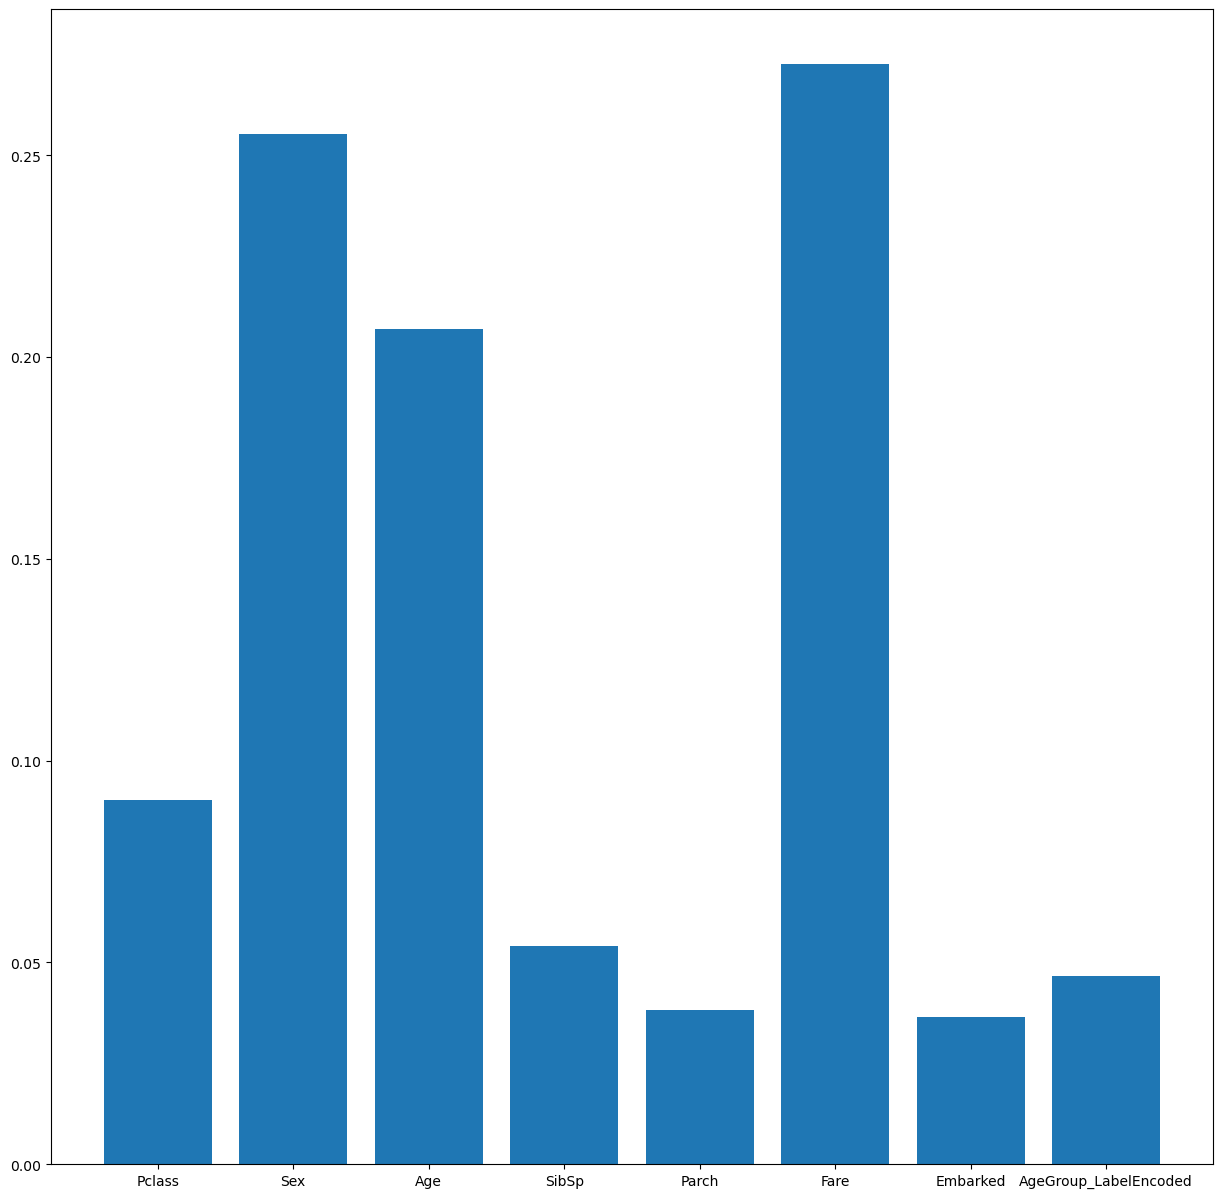

In [102]:
plt.figure(figsize =( 15,15))
plt.bar(X.columns,rf.feature_importances_)
plt.show()

The important features are fare, sex, Age and P-class whereas SibSp is moderately important and Parch, Embarked have less importance.

''''''''''''The End'''''''''''''''